In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LogisticRegression
from sklearn.svm import SVR,SVC
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import shap
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,RobustScaler
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import DBSCAN
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import manhattan_distances
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from scipy.stats import chi2_contingency, f_oneway, pearsonr, ttest_ind, pointbiserialr
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

#EDA


In [ ]:
print("Shape of dataframe:", df.shape)
print("Columns in the dataset:", df.columns.tolist())

Shape of dataframe: (973, 15)
Columns in the dataset: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [ ]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
for feature in ["Gender", "Workout_Type", "Experience_Level"]:
    df[feature] = df[feature].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            973 non-null    int64   
 1   Gender                         973 non-null    category
 2   Weight (kg)                    973 non-null    float64 
 3   Height (m)                     973 non-null    float64 
 4   Max_BPM                        973 non-null    int64   
 5   Avg_BPM                        973 non-null    int64   
 6   Resting_BPM                    973 non-null    int64   
 7   Session_Duration (hours)       973 non-null    float64 
 8   Calories_Burned                973 non-null    float64 
 9   Workout_Type                   973 non-null    category
 10  Fat_Percentage                 973 non-null    float64 
 11  Water_Intake (liters)          973 non-null    float64 
 12  Workout_Frequency (days/week)  973 n

The dataset comprises 973 data points, each with 15 features. There is no missing value in the dataset. Descriptive statistics for each feature are generated above and a few highlights like unit, datatype, and range/domain are listed below. Here we categorize the features into three categories: demographic data, physiological data, and workout data.

Personal Data
Age (year): Numerical (18-59)
Gender: Categorical (Male, Female)
Weight (kg): Numerical (40-130)
Height (m): Numerical (1.5-2)
Physiological Data
Maximum BPM (beats/minute): Numerical (160-199)
Average BPM (beats/minute): Numerical (120-169)
Resting BPM (beats/minute): Numerical (50-74)
Body mass index (kg/height): Numerical (12.3-49.8)
Body fat percentage (%): Numerical (10-35)
Workout Data
Workout session duration (hours): Numerical (0.5-2)
Calories burned (calories): Numerical (303-1.78k)
Daily water intake (liters): Numerical (1.5-3.7)
Workout frequency (days/week): Numerical (2-5)
Experience level: Ordinal (1:Beginner, 2:Intermediate, 3:Expert)
Workout type: Categorical (Cardio, HIIT, Strength, Yoga)


In [ ]:
# create contingency table
contingency_table = pd.crosstab(df["Gender"], df["Workout_Type"])

# perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# display results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Contingency Table:
 Workout_Type  Cardio  HIIT  Strength  Yoga
Gender                                    
Female           126   107       123   106
Male             129   114       135   133

Chi-Square Statistic: 1.4012902282957471
P-Value: 0.705232322383724
Degrees of Freedom: 3
Expected Frequencies:
 [[121.07913669 104.9352518  122.50359712 113.48201439]
 [133.92086331 116.0647482  135.49640288 125.51798561]]


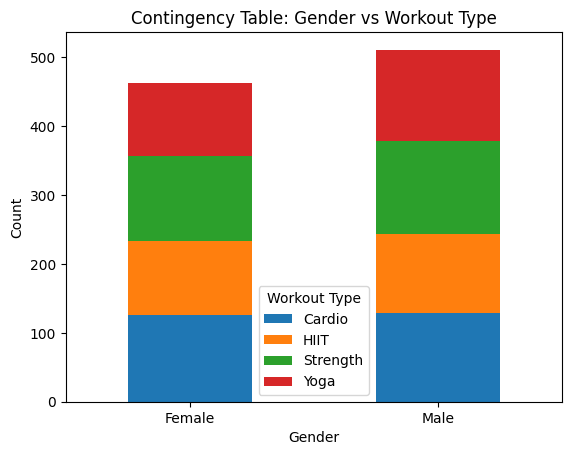

In [ ]:
# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Contingency Table: Gender vs Workout Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Workout Type')

In [ ]:
# Conducting ANOVA test for Age, Weight, and Height against Workout Type
anova_results = {}
for feature in ['Age', 'Weight (kg)', 'Height (m)']:
    groups = [df[feature][df['Workout_Type'] == category].values for category in df['Workout_Type'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[feature] = {'F-Statistic': f_statistic, 'P-Value': p_value}

pd.DataFrame(anova_results)

Age  Weight (kg)  Height (m)
F-Statistic  0.825395     0.813012    1.048456
P-Value      0.479953     0.486742    0.370261

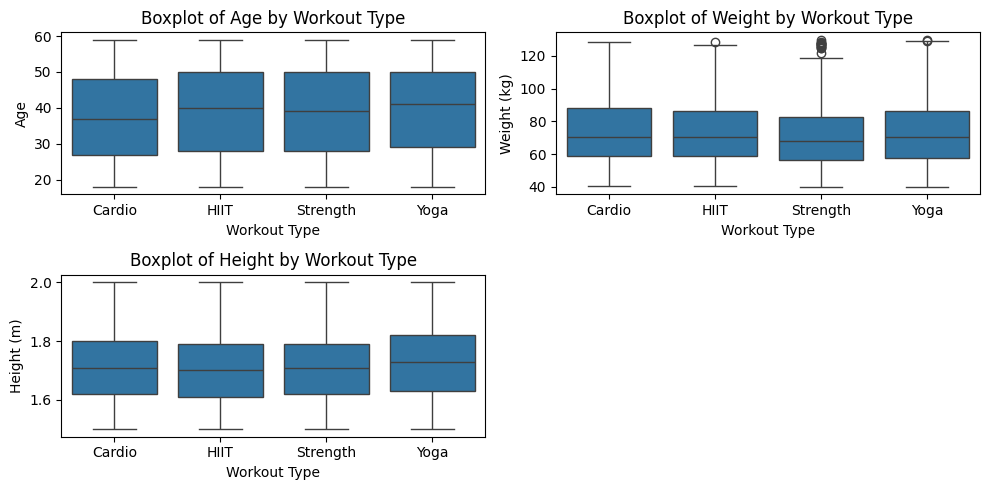

In [ ]:
# Set up the 2x2 plotting area
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Generate boxplot for Age in subplot [0, 0]
sns.boxplot(x='Workout_Type', y='Age', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Age by Workout Type')
axs[0, 0].set_xlabel('Workout Type')
axs[0, 0].set_ylabel('Age')

# Generate boxplot for Weight in subplot [0, 1]
sns.boxplot(x='Workout_Type', y='Weight (kg)', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Weight by Workout Type')
axs[0, 1].set_xlabel('Workout Type')
axs[0, 1].set_ylabel('Weight (kg)')

# Generate boxplot for Height in subplot [1, 0]
sns.boxplot(x='Workout_Type', y='Height (m)', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Height by Workout Type')
axs[1, 0].set_xlabel('Workout Type')
axs[1, 0].set_ylabel('Height (m)')

# Leave the subplot [1, 1] blank
axs[1, 1].axis('off')

plt.tight_layout()


In [ ]:
pointbiserialr(df["Gender"] == "Male", df["Weight (kg)"])

SignificanceResult(statistic=0.5793402286170082, pvalue=2.6475772665298664e-88)

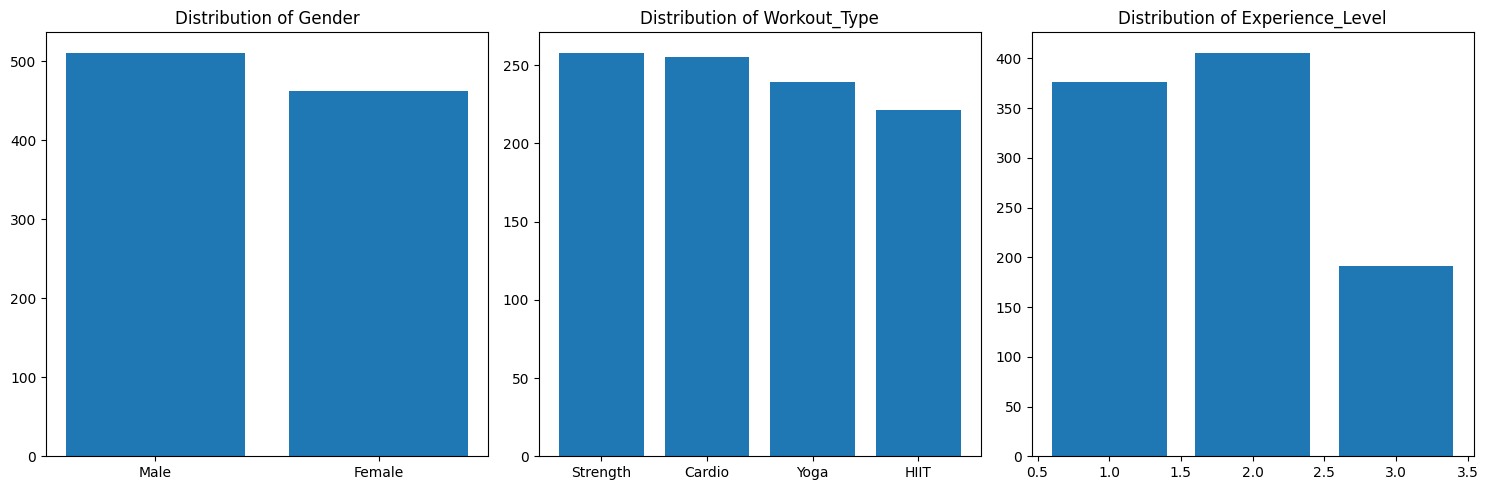

In [ ]:
#Distriution of categorical features
categorical_features = df.select_dtypes(include=["category"]).columns
fig, axes = plt.subplots(1, len(categorical_features), figsize=(5 * len(categorical_features), 5))

for ax, feature in zip(axes, categorical_features):
    counts = df[feature].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()

###Distribution of Numerical Features

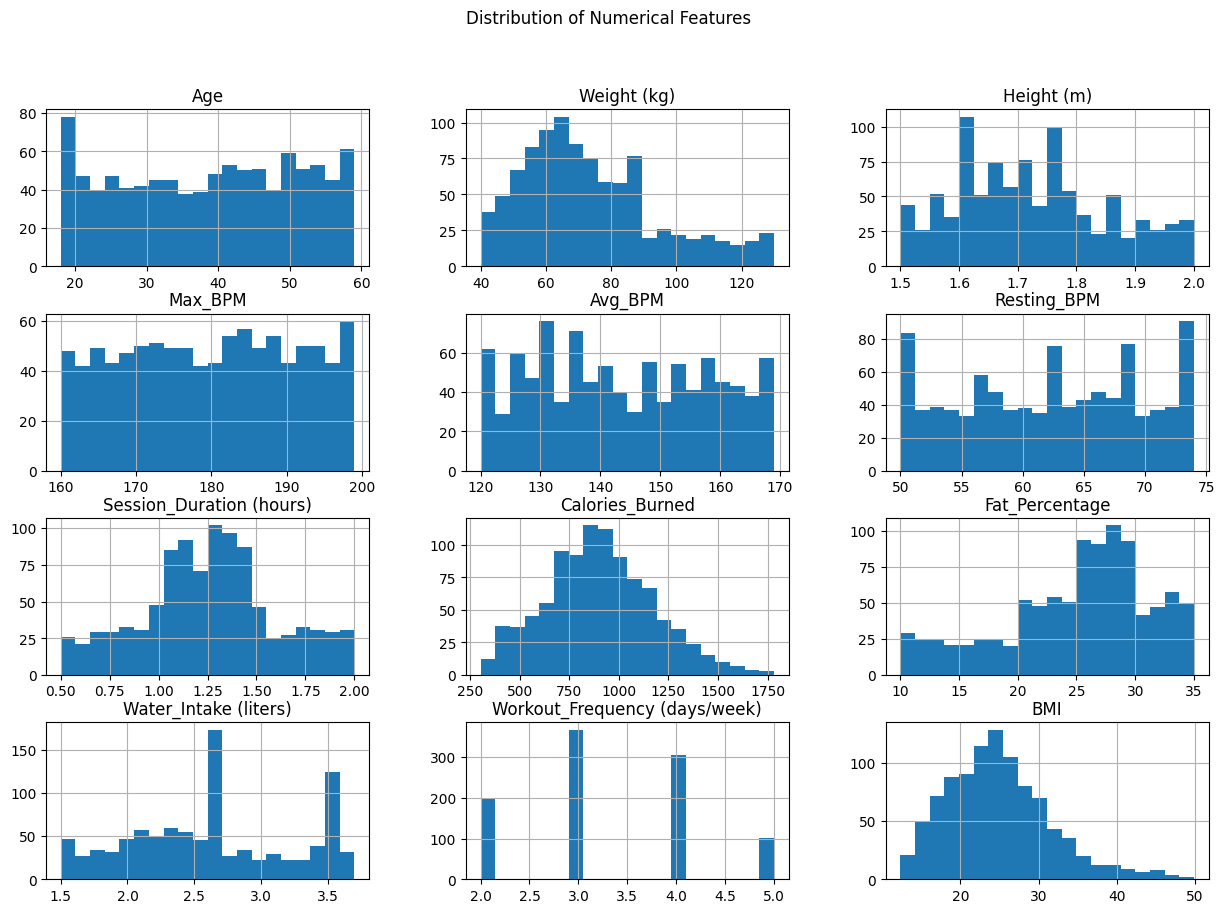

In [ ]:
#Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

Number of Outliers Per Numeric Feature:
Age: 0
Weight (kg): 9
Height (m): 0
Max_BPM: 0
Avg_BPM: 0
Resting_BPM: 0
Session_Duration (hours): 0
Calories_Burned: 10
Fat_Percentage: 0
Water_Intake (liters): 0
Workout_Frequency (days/week): 0
BMI: 25


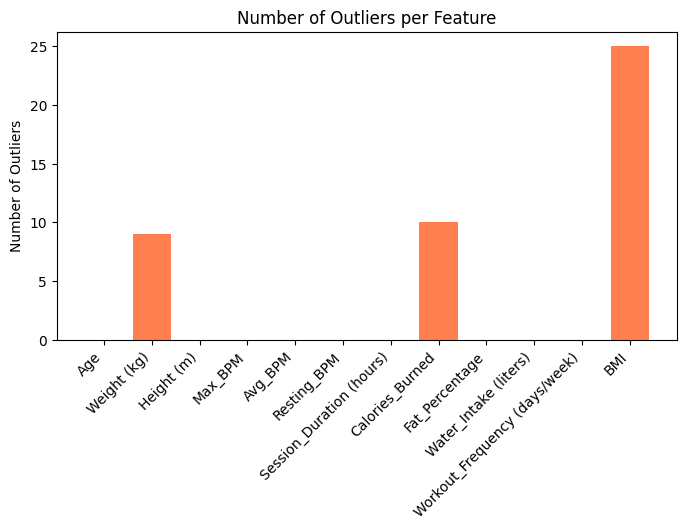

In [ ]:
#Identifying Outliers
outliers = {}
outlier_columns = []

print("Number of Outliers Per Numeric Feature:")

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f'{feature}: {outliers[feature].shape[0]}')
    if outliers[feature].shape[0] != 0:
        outlier_columns.append(feature)

outlier_counts = {feature:data.shape[0] for feature, data in outliers.items()}

features = list(outlier_counts.keys())
counts = list(outlier_counts.values())

plt.figure(figsize=(8, 4))
plt.bar(features, counts, color='coral')
plt.ylabel("Number of Outliers")
plt.title("Number of Outliers per Feature")
plt.xticks(rotation=45, ha="right")
plt.show()

We identified 44 outliers in the dataset. However, given the limited amount of data and our goal to ensure inclusivity in the analysis, we chose to retain these outliers rather than discard potentially valuable information. To address their impact, we will use the Robust Scaler later, a method specifically designed to handle outliers effectively by scaling features based on the median and interquartile range, thereby reducing their influence.

In [ ]:
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0                    3.5                              4                3   
1                    2.1                              4                2   
2                    2.3                              4                2   
3                    2.1                              3                1   
4                    2.8                              3                1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

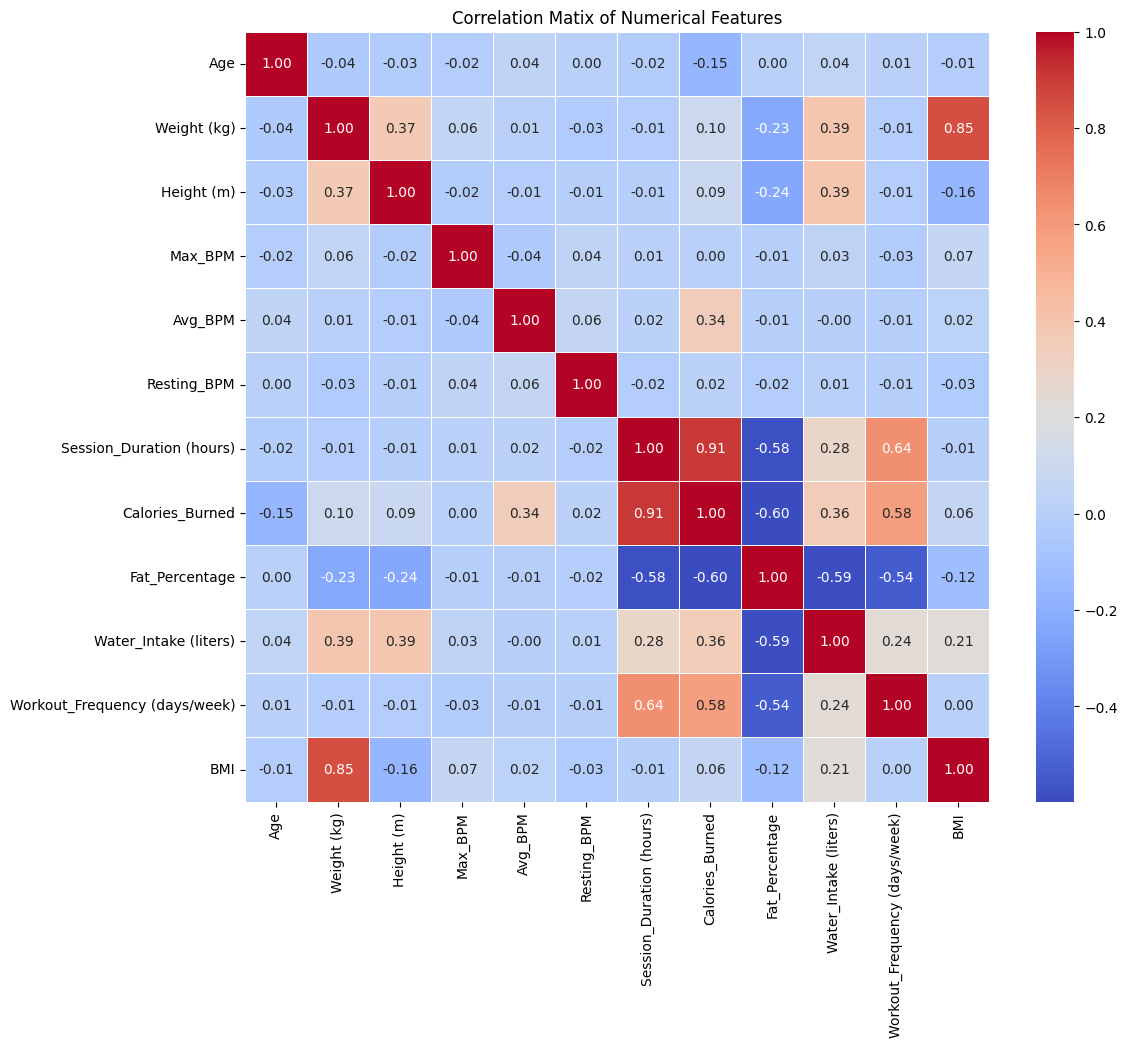

In [ ]:
#Correlation Matric
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matix of Numerical Features")
plt.show()

From the correlation matrix, we observe that Session_Duration (hours) has the strongest positive correlation (r = 0.91) with the target variable Calories_Burned, making it a key predictor. Additionally, Workout_Frequency (days/week) and Avg_BPM also show moderate positive correlations (r = 0.64 and r = 0.34, respectively), suggesting they are important features to include in the predictive model. However, certain features, such as Weight(kg) and BMI, are highly correlated with each other (r = 0.85). This multicollinearity may introduce redundancy and affect model interpretability. To address this, we will employ regularization techniques (e.g., Lasso or Elastic Net) during model training to reduce the impact of multicollinearity by penalizing less informative features.

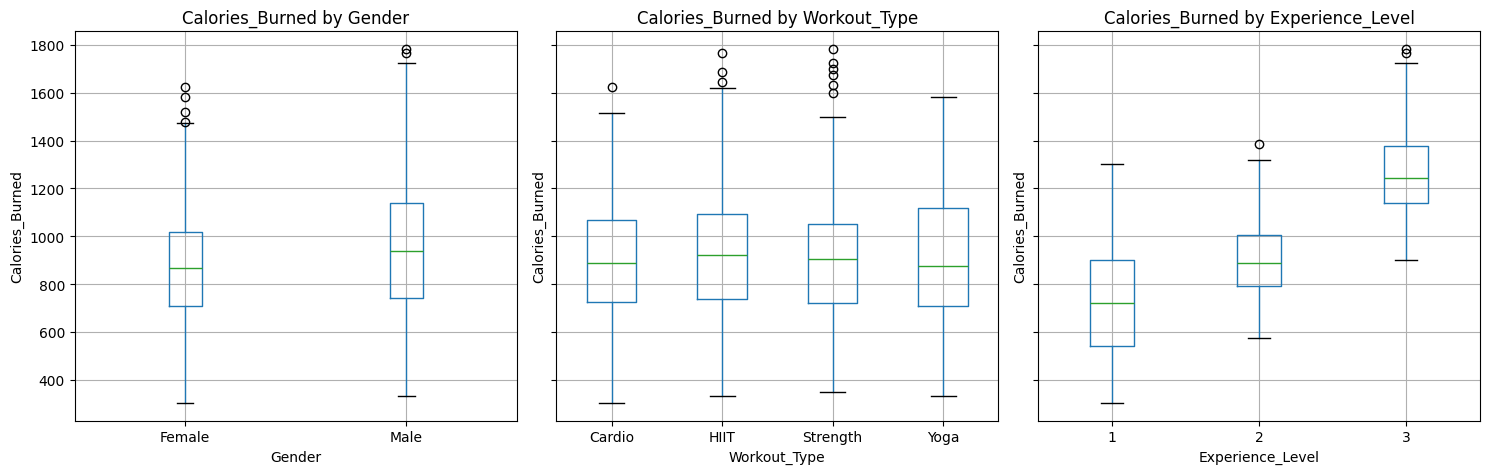

In [ ]:
#Bivariate Analysis (Categorical Fetaures vs Fitness Outcome (Calorie_burned))
target = "Calories_Burned"

fig, axes = plt.subplots(1, len(categorical_features), figsize=(5 * len(categorical_features), 5), sharey=True)

for ax, feature in zip(axes, categorical_features):
    df.boxplot(column=target, by=feature, ax=ax)
    ax.set_title(f'{target} by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)

plt.suptitle('')
plt.tight_layout()

For Gender, males and females have similar distributions, with males showing a slightly higher median calorie burn. For Workout_Type, the median calorie burn is comparable across workout types, though there is slightly higher variability in Strength and Yoga, suggesting different intensity levels among individuals. Finally, for Experience_Level, there is a clear upward trend, with more experienced individuals (level 3) burning significantly more calories on average compared to beginners (level 1) and intermediates (level 2). This indicates that Experience_Level may be a strong predictor of Calories_Burned.

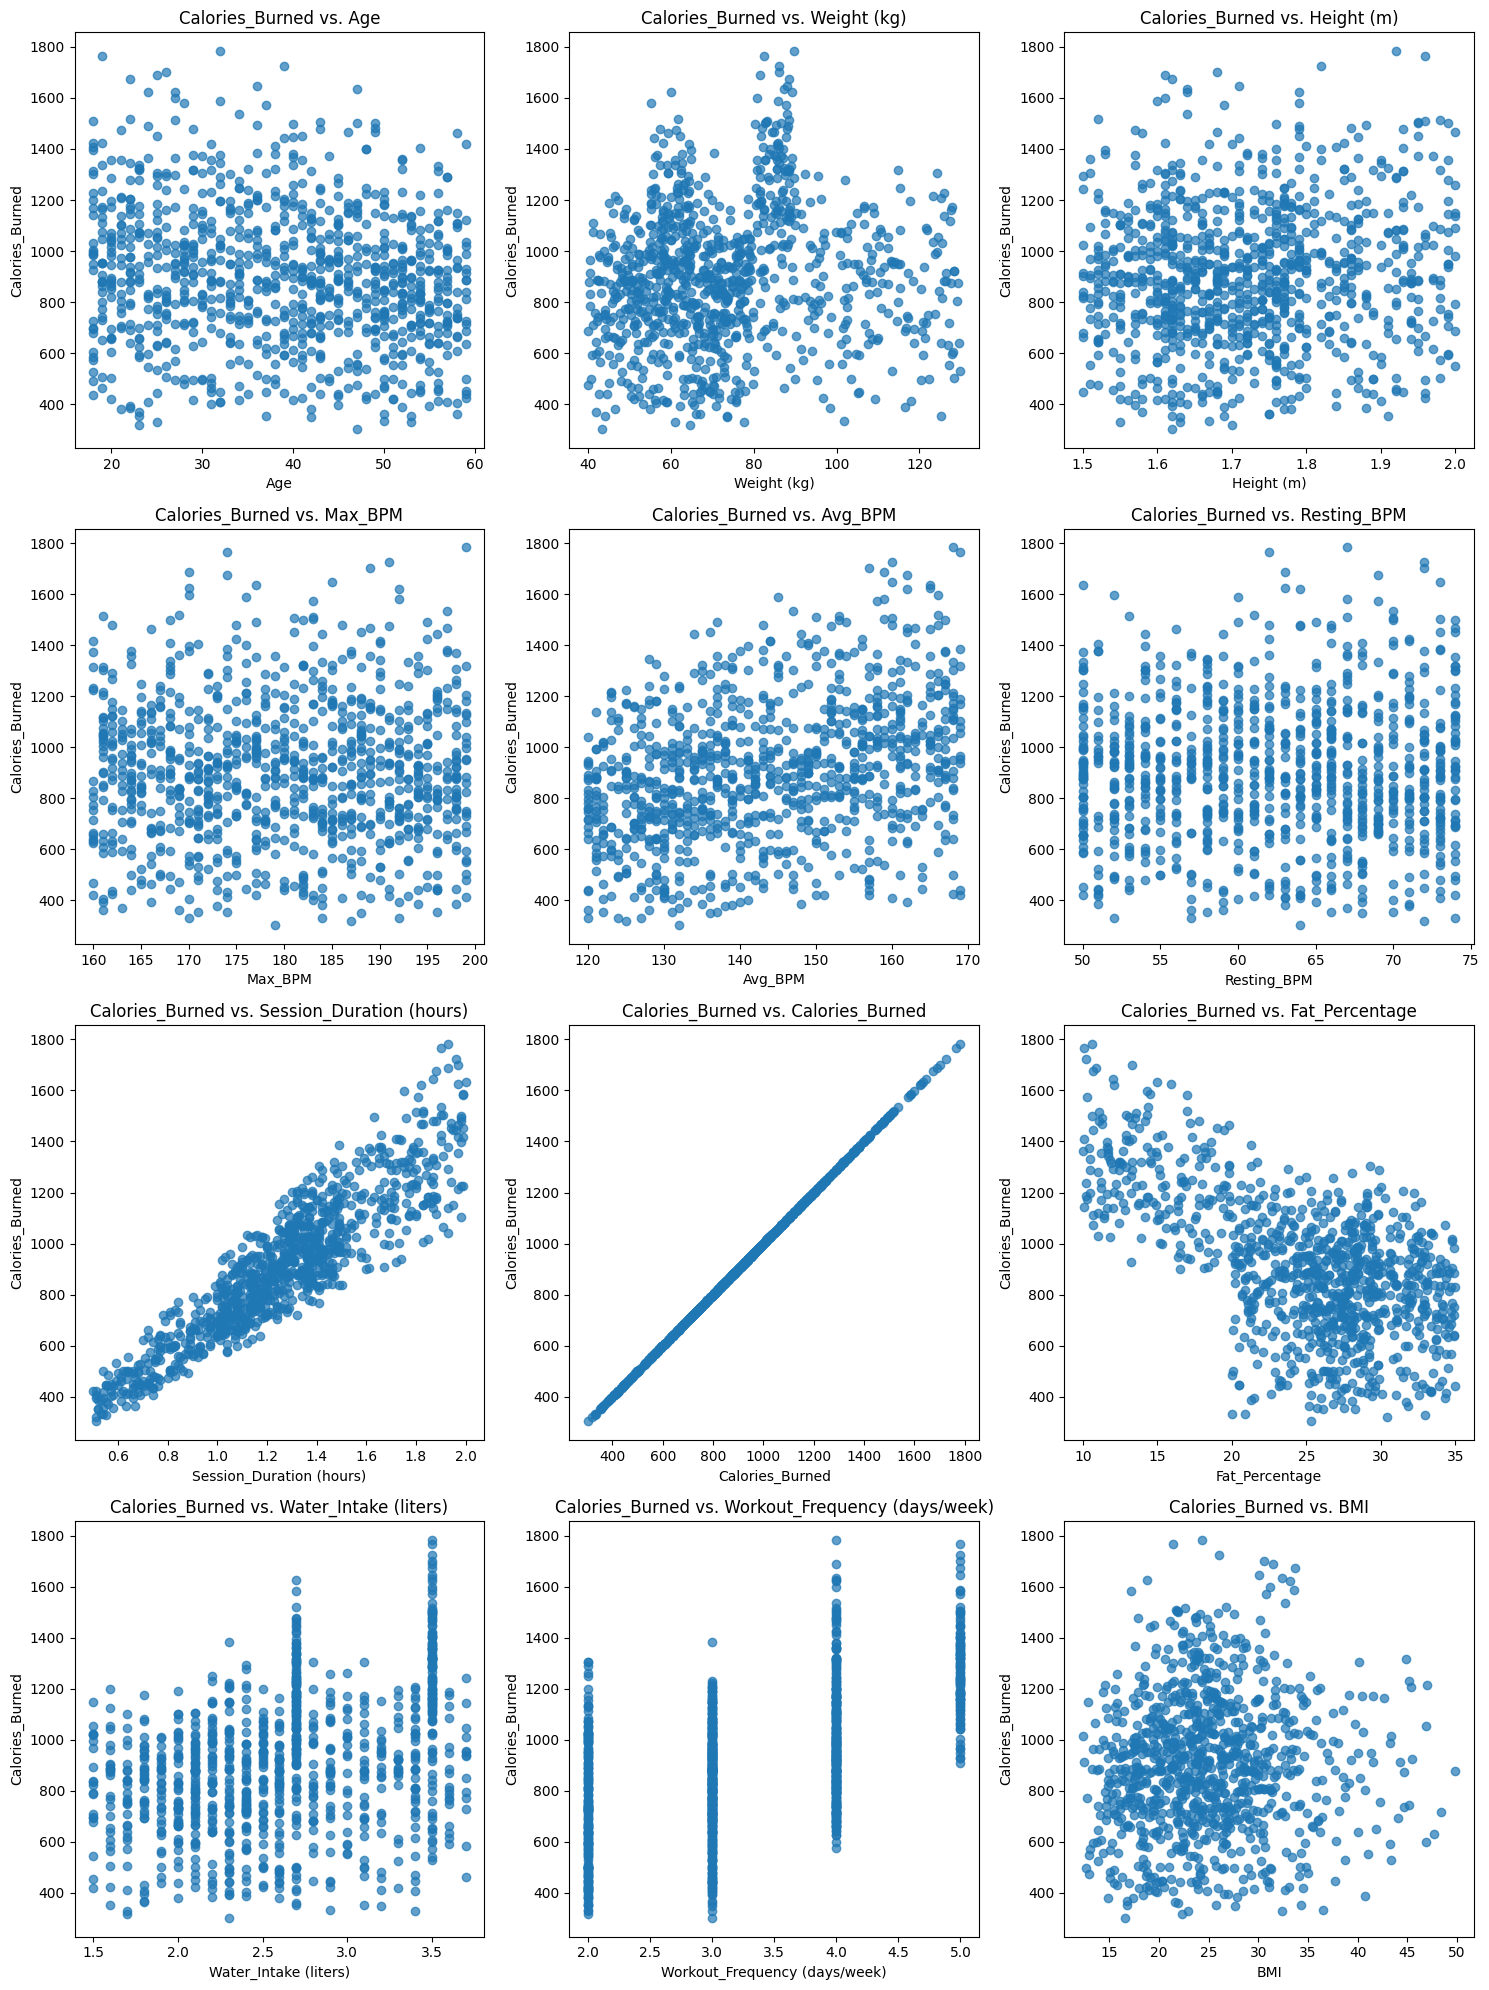

In [ ]:
#Bivariate Analysis (Numerical Fetaures vs Fitness Outcome (Calorie_burned))
target = "Calories_Burned"

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, feature in zip(axes, numerical_features):
    ax.scatter(df[feature], df[target], alpha=0.7)
    ax.set_title(f'{target} vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

#Data Pre-Processing

###Standard Scaling + Robust Scaling







In [ ]:
update_df=df.copy()
scaled_data = df.copy()
robust_scaler = RobustScaler()
target_columns=['Calories_Burned','Session_Duration (hours)']
numerical_features = df.select_dtypes(include=['number']).columns
for column in numerical_features:
    if column in outlier_columns:
        scaled_data[column] = robust_scaler.fit_transform(df[[column]])
    else:
        standard_scaler = StandardScaler()
        scaled_data[column] = standard_scaler.fit_transform(df[[column]])


df=scaled_data


In [ ]:
df.head()

Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343    Male     0.655914   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965  Female     0.175627   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964  Female    -0.068100   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    Male    -0.602151   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    Male    -0.856631    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                  1.264598         1.179775         Yoga       -1.978321   
1                  0.127098        -0.028090         HIIT        1.426301   
2                 -0.427068        -0.606742       Cardio        1.346380   
3                 -1.943735        -1.014045     Strength        0.611110   
4                 -1.797902        -0.946629     Strength        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0               1.455967                       0.743295                3   
1              -0.877898                       0.743295                2   
2              -0.544488                       0.743295                2   
3              -0.877898                      -0.352502                1   
4               0.289035                      -0.352502                1   

        BMI  
0  0.714793  
1  0.927811  
2  0.065089  
3 -0.680473  
4 -1.156213

###OneHot Encoding

In [ ]:
encoded_df = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

In [ ]:
encoded_df.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343     0.655914   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965     0.175627   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964    -0.068100   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    -0.602151   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    -0.856631    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  1.264598         1.179775       -1.978321   
1                  0.127098        -0.028090        1.426301   
2                 -0.427068        -0.606742        1.346380   
3                 -1.943735        -1.014045        0.611110   
4                 -1.797902        -0.946629        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0               1.455967                       0.743295                3   
1              -0.877898                       0.743295                2   
2              -0.544488                       0.743295                2   
3              -0.877898                      -0.352502                1   
4               0.289035                      -0.352502                1   

        BMI  Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  \
0  0.714793         True              False                  False   
1  0.927811        False               True                  False   
2  0.065089        False              False                  False   
3 -0.680473         True              False                   True   
4 -1.156213         True              False                   True   

   Workout_Type_Yoga  
0               True  
1              False  
2              False  
3              False  
4              False

In [ ]:
df['Gender_Male'] = encoded_df['Gender_Male'].astype(int)
df['Workout_Type_HIIT'] = encoded_df['Workout_Type_HIIT'].astype(int)
df['Workout_Type_Strength'] = encoded_df['Workout_Type_Strength'].astype(int)
df['Workout_Type_Yoga'] = encoded_df['Workout_Type_Yoga'].astype(int)


In [ ]:
df.head()

Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343    Male     0.655914   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965  Female     0.175627   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964  Female    -0.068100   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    Male    -0.602151   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    Male    -0.856631    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                  1.264598         1.179775         Yoga       -1.978321   
1                  0.127098        -0.028090         HIIT        1.426301   
2                 -0.427068        -0.606742       Cardio        1.346380   
3                 -1.943735        -1.014045     Strength        0.611110   
4                 -1.797902        -0.946629     Strength        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0               1.455967                       0.743295                3   
1              -0.877898                       0.743295                2   
2              -0.544488                       0.743295                2   
3              -0.877898                      -0.352502                1   
4               0.289035                      -0.352502                1   

        BMI  Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  \
0  0.714793            1                  0                      0   
1  0.927811            0                  1                      0   
2  0.065089            0                  0                      0   
3 -0.680473            1                  0                      1   
4 -1.156213            1                  0                      1   

   Workout_Type_Yoga  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0

In [ ]:
df=df.drop(columns=['Gender', 'Workout_Type'])

In [ ]:
df.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343     0.655914   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965     0.175627   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964    -0.068100   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    -0.602151   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    -0.856631    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  1.264598         1.179775       -1.978321   
1                  0.127098        -0.028090        1.426301   
2                 -0.427068        -0.606742        1.346380   
3                 -1.943735        -1.014045        0.611110   
4                 -1.797902        -0.946629        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0               1.455967                       0.743295                3   
1              -0.877898                       0.743295                2   
2              -0.544488                       0.743295                2   
3              -0.877898                      -0.352502                1   
4               0.289035                      -0.352502                1   

        BMI  Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  \
0  0.714793            1                  0                      0   
1  0.927811            0                  1                      0   
2  0.065089            0                  0                      0   
3 -0.680473            1                  0                      1   
4 -1.156213            1                  0                      1   

   Workout_Type_Yoga  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0

#Machine Learning


###What are the most significant factors influencing fitness outcomes across different demographic groups?
We will tackle this question by using calories burned as a target and then finding the feature importance.

In [ ]:
X = df.drop(columns=['Calories_Burned'])
y = df['Calories_Burned']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Initializing dictionary to choose the best model
results = {}

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    'R2': r2_score(y_test, y_pred_linear)
}

In [ ]:
lasso = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_lasso.fit(X_train, y_train)
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
results['Lasso Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'R2': r2_score(y_test, y_pred_lasso)
}

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
ridge = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_ridge = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_ridge.fit(X_train, y_train)
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
results['Ridge Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'R2': r2_score(y_test, y_pred_ridge)
}

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
svr = SVR()
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid_svr = GridSearchCV(svr, svr_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_svr.fit(X_train, y_train)
best_svr = grid_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)
results['Support Vector Machine'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    'R2': r2_score(y_test, y_pred_svr)
}

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
#For feed forward network
X_train_new,X_val,y_train_new,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [ ]:
feed_forward_model_small_relu = Sequential()
feed_forward_model_small_relu.add(Dense(X_train_new.shape[1], activation='relu'))
feed_forward_model_small_relu.add(Dense(10, activation='relu'))
feed_forward_model_small_relu.add(Dense(1))  # Regression task

feed_forward_model_small_relu.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
history = feed_forward_model_small_relu.fit(
    X_train_new, y_train_new,
    validation_data=(X_val, y_val),
    epochs=50, batch_size=16, verbose=0
)
y_pred_nn = feed_forward_model_small_relu.predict(X_test).flatten()
results['Neural Network'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn)),
    'R2': r2_score(y_test, y_pred_nn)
}

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = {
    'Random Forest': best_rf,
    'Linear Regression': linear,
    'Lasso Regression': best_lasso,
    'Ridge Regression': best_ridge,
    'Support Vector Machine': best_svr,
    'Neural Network': feed_forward_model_small_relu
}[best_model_name]

In [ ]:
print("Performance Comparison:")
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.4f}")

print(f"Best model: {best_model_name}")

Performance Comparison:
Linear Regression: RMSE = 0.11, R2 = 0.9803
Lasso Regression: RMSE = 0.12, R2 = 0.9785
Ridge Regression: RMSE = 0.11, R2 = 0.9803
Support Vector Machine: RMSE = 0.11, R2 = 0.9817
Neural Network: RMSE = 0.10, R2 = 0.9853
Random Forest: RMSE = 0.14, R2 = 0.9717
Best model: Neural Network


In [ ]:
if best_model_name == 'Random Forest':
    importances = best_model.feature_importances_
    feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)


elif best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    coef = best_model.coef_
    feature_std = np.std(X_train, axis=0)
    feature_importance = sorted(zip(X.columns, coef * feature_std), key=lambda x: abs(x[1]), reverse=True)


elif best_model_name in ['Support Vector Machine', 'Neural Network']:
    explainer = shap.Explainer(best_model, X_train)
    shap_values = explainer(X_test)
    mean_importance = np.abs(shap_values.values).mean(axis=0)
    feature_importance = sorted(zip(X.columns, mean_importance), key=lambda x: x[1], reverse=True)


PermutationExplainer explainer: 196it [00:20,  6.43it/s]                         


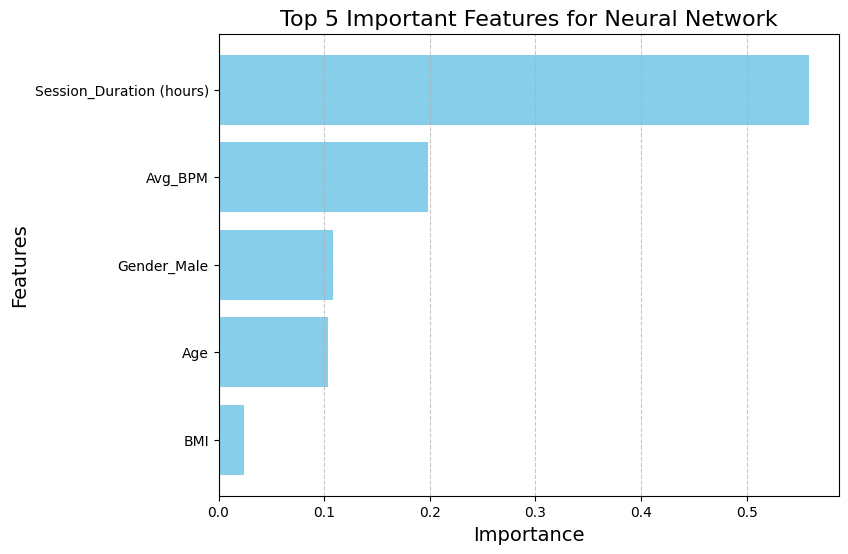

In [ ]:
top_features = feature_importance[:5]
features, importances = zip(*top_features)

plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title(f'Top 5 Important Features for {best_model_name}', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

###How can we develop predictive models for personalized exercise recommendations that are tailored to individual characteristics and fitness goals?

We can tackle this problem by using a multioutput regressor that can predict both calories burned and session duration. We will run a sample test on one of the random test cases to predict that given the workout type the person needs to burn **x** calroies in **y** hours.

In [ ]:
df=update_df
encoded_df = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)
df['Gender_Male'] = encoded_df['Gender_Male'].astype(int)
df['Workout_Type_HIIT'] = encoded_df['Workout_Type_HIIT'].astype(int)
df['Workout_Type_Strength'] = encoded_df['Workout_Type_Strength'].astype(int)
df['Workout_Type_Yoga'] = encoded_df['Workout_Type_Yoga'].astype(int)
df=df.drop(columns=['Gender', 'Workout_Type'])


In [ ]:
df.head()

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0                    3.5                              4                3   
1                    2.1                              4                2   
2                    2.3                              4                2   
3                    2.1                              3                1   
4                    2.8                              3                1   

     BMI  Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  \
0  30.20            1                  0                      0   
1  32.00            0                  1                      0   
2  24.71            0                  0                      0   
3  18.41            1                  0                      1   
4  14.39            1                  0                      1   

   Workout_Type_Yoga  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0

In [ ]:
# The code for workout type based clustering is implemented towards the end of the file.
X = df.drop(columns=['Calories_Burned', 'Session_Duration (hours)'])
y = df[['Calories_Burned', 'Session_Duration (hours)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state=42)

model = MultiOutputRegressor(rf)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("RMSE for Calories_Burned:", rmse[0])
print("RMSE for Session_Duration:", rmse[1])
print("R2 for Calories_Burned:", r2[0])
print("R2 for Session_Duration:", r2[1])

RMSE for Calories_Burned: 168.4606413181825
RMSE for Session_Duration: 0.22677732295167474
R2 for Calories_Burned: 0.6598264435009356
R2 for Session_Duration: 0.6167276832500446


In [ ]:
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}


rf = RandomForestRegressor(random_state=42)
model = MultiOutputRegressor(rf)


grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("RMSE for Calories_Burned:", rmse[0])
print("RMSE for Session_Duration:", rmse[1])
print("R2 for Calories_Burned:", r2[0])
print("R2 for Session_Duration:", r2[1])

Fitting 5 folds for each of 81 candidates, totalling 405 fits
RMSE for Calories_Burned: 170.40841641528564
RMSE for Session_Duration: 0.22512290950986516
R2 for Calories_Burned: 0.6519146603548065
R2 for Session_Duration: 0.6222994742575971


In [ ]:
linear_regressor = LinearRegression()
model = MultiOutputRegressor(linear_regressor)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')


print("RMSE for Calories_Burned:", rmse[0])
print("RMSE for Session_Duration:", rmse[1])
print("R2 for Calories_Burned:", r2[0])
print("R2 for Session_Duration:", r2[1])

RMSE for Calories_Burned: 173.065976104282
RMSE for Session_Duration: 0.23387136932246966
R2 for Calories_Burned: 0.6409730550900954
R2 for Session_Duration: 0.5923735841501772


In [ ]:
#Example
def generate_recommendation(user_features, best_model):
    prediction = best_model.predict([user_features])
    calories, duration = prediction[0]
    return f"Recommended workout: Burn {calories:.0f} calories in {duration:.2f} hours"

best_model = grid_search.best_estimator_

user_features = X_test.iloc[0].values
recommendation = generate_recommendation(user_features, best_model)
print(recommendation)


Recommended workout: Burn 889 calories in 1.28 hours


###What patterns in workout adherence and progression can be uncovered to inform strategies for improving long-term engagement with fitness routines?

We will tackle this problem using Experience Level as the target and using random forest classifier and hence using mean to calculate the progression rates.

In [ ]:
X = df.drop(columns=['Experience_Level'])
y = df['Experience_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
results = {}

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Classification Report': classification_report(y_test, y_pred_rf)
}

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
svc_model = SVC(random_state=42)
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
results['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Classification Report': classification_report(y_test, y_pred_svc)
}

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Classification Report': classification_report(y_test, y_pred_lr)
}

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
print("Performance Comparison:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])

best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
print(f"\nBest model: {best_model_name}")

Performance Comparison:

Random Forest:
Accuracy: 0.9179
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.81      0.89        78
           2       0.83      0.99      0.90        75
           3       1.00      1.00      1.00        42

    accuracy                           0.92       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.93      0.92      0.92       195


Support Vector Machine:
Accuracy: 0.8923
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.83      0.86        78
           2       0.84      0.89      0.86        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.89      0.89      0.89       195


Logistic Regression:
Accuracy: 0.8718
Classification Report:
              precision    reca

In [ ]:
progression_analysis = df.groupby('Experience_Level').agg({
    'Workout_Frequency (days/week)': 'mean',
    'Session_Duration (hours)': 'mean',
    'Calories_Burned': 'mean',
    'Water_Intake (liters)': 'mean'
}).reset_index()
styled_analysis = progression_analysis.style.format({
    'Workout_Frequency (days/week)': '{:.2f}',
    'Session_Duration (hours)': '{:.2f}',
    'Calories_Burned': '{:.0f}',
    'Water_Intake (liters)': '{:.2f}'
}).set_caption('Progression Analysis by Experience Level')

display(styled_analysis)


### Analysis and Implementation of 2 best recommendations of workout_type

In [ ]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df['Workout_Frequency (days/week)'] = df['Workout_Frequency (days/week)'] / 7
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                       0.571429                 3   
1                    2.1                       0.571429                 2   
2                    2.3                       0.571429                 2   
3                    2.1                       0.428571                 1   
4                    2.8                       0.428571                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [ ]:
unique_values_exp = df['Experience_Level'].nunique()
print(unique_values_exp)
unique_values_freq = df['Workout_Frequency (days/week)'].nunique()
print(unique_values_freq)
unique_values_type = df['Workout_Type'].nunique()
print(unique_values_type)

3
4
4


In [ ]:
# The categorical variables are Gender (2),Experience level(3) and workout type (4)

In [ ]:
#We drop the work out type column and perform clustering.
#Steps-
#1. Normalize all numeric values.
#2. 6 buckets of categorical variables as categories- M1, M2, M3, F1, F2, F3. Grouping on this basis is done.
#3. Vector representation of each user is obtained.
#4. Clustering is done using xxx distance metric.

In [ ]:
clustering_df=df.drop(columns=["Workout_Type"])

In [ ]:
categorical_features = ["Workout_Type", "Gender", "Experience_Level"]
numeric_features = df.drop(columns=categorical_features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
scaled_df.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343     0.681493   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965     0.049316   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964    -0.271491   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  1.264598         1.495690       -1.978321   
1                  0.127098        -0.082284        1.426301   
2                 -0.427068        -0.838243        1.346380   
3                 -1.943735        -1.370351        0.611110   
4                 -1.797902        -1.282278        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/week)       BMI  
0               1.455967                       0.743295  0.794278  
1              -0.877898                       0.743295  1.064652  
2              -0.544488                       0.743295 -0.030361  
3              -0.877898                      -0.352502 -0.976669  
4               0.289035                      -0.352502 -1.580503

In [ ]:
df = pd.concat([scaled_df, df[categorical_features].reset_index(drop=True)], axis=1)

print(df)

          Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343     0.681493   -0.098545  0.010081  0.922970    -0.303555   
1    0.600965     0.049316   -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964    -0.271491   -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   
..        ...          ...         ...       ...       ...          ...   
968 -1.206066     0.624880    0.136465  0.617733  0.992716     0.652299   
969 -1.123928    -0.342257   -0.881911  0.357311  1.550685    -0.849757   
970  1.668756    -0.634756    0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964     2.478951    0.841495  1.572614  0.155764    -0.030454   
972  0.600965     0.700363   -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                    1.264598    

In [ ]:
# Grouping into 6 buckets
M1 = df[(df["Gender"] == "Male") & (df["Experience_Level"] == 1)]
M2 = df[(df["Gender"] == "Male") & (df["Experience_Level"] == 2)]
M3 = df[(df["Gender"] == "Male") & (df["Experience_Level"] == 3)]

F1 = df[(df["Gender"] == "Female") & (df["Experience_Level"] == 1)]
F2 = df[(df["Gender"] == "Female") & (df["Experience_Level"] == 2)]
F3 = df[(df["Gender"] == "Female") & (df["Experience_Level"] == 3)]

print("M1 shape:", M1.shape)
print("M2 shape:", M2.shape)
print("M3 shape:", M3.shape)
print("F1 shape:", F1.shape)
print("F2 shape:", F2.shape)
print("F3 shape:", F3.shape)

M1 shape: (197, 15)
M2 shape: (213, 15)
M3 shape: (101, 15)
F1 shape: (179, 15)
F2 shape: (193, 15)
F3 shape: (90, 15)


In [ ]:
print(M1.columns)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI',
       'Workout_Type', 'Gender', 'Experience_Level'],
      dtype='object')


In [ ]:
M1_type = M1[['Workout_Type']].copy()
M2_type = M2[['Workout_Type']].copy()
M3_type = M3[['Workout_Type']].copy()
F1_type = F1[['Workout_Type']].copy()
F2_type = F2[['Workout_Type']].copy()
F3_type= F3[['Workout_Type']].copy()

# Check the updated dataframes
print("Updated M1 DataFrame:\n", M1_type.head())

Updated M1 DataFrame:
    Workout_Type
3      Strength
4      Strength
9        Cardio
10         HIIT
13         HIIT


In [ ]:
#We drop the Gender and Experience level data from each subgroup M1, M2, M3, F1, F2, F3

In [ ]:
M1 = M1.drop(columns=["Gender", "Experience_Level", "Workout_Type"])
M2 = M2.drop(columns=["Gender", "Experience_Level", "Workout_Type"])
M3 = M3.drop(columns=["Gender", "Experience_Level", "Workout_Type"])
F1 = F1.drop(columns=["Gender", "Experience_Level", "Workout_Type"])
F2 = F2.drop(columns=["Gender", "Experience_Level", "Workout_Type"])
F3 = F3.drop(columns=["Gender", "Experience_Level", "Workout_Type"])

# Check the updated dataframes
print("Updated M1 DataFrame:\n", M1.head())

Updated M1 DataFrame:
          Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
3  -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4  -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   
9  -0.877515     1.318387    0.919831 -0.944799 -0.541697     0.242647   
10  0.190276     2.214757   -0.411891  0.704540  0.155764    -1.122858   
13  0.190276     0.973992    2.173217 -0.076726 -0.541697     0.925400   

    Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
3                  -1.943735        -1.370351        0.611110   
4                  -1.797902        -1.282278        0.675047   
9                  -0.514568        -0.357512        0.754967   
10                 -1.272902        -1.146498       -0.715574   
13                 -0.222902        -0.408887        0.419300   

    Water_Intake (liters)  Workout_Frequency (days/week)       BMI  
3               -0.877898                      -0.352502 -0.976669  
4  

In [ ]:
# Apply DBSCAN and add cluster labels to the dataframe
def apply_dbscan_and_add_labels(df):
    # Apply DBSCAN to the scaled numeric data
    dbscan = DBSCAN(eps=0.5, min_samples=5)

    # Perform DBSCAN clustering
    cluster_labels = dbscan.fit_predict(df)  # 'df' should already be the preprocessed numeric data

    # Add the cluster labels to the dataframe as a new column
    df['Cluster'] = cluster_labels

    return df

In [ ]:
# Apply DBSCAN to each of the M1, M2, M3, F1, F2, F3 dataframes
M1_dbscan = apply_dbscan_and_add_labels(M1)
M2_dbscan = apply_dbscan_and_add_labels(M2)
M3_dbscan = apply_dbscan_and_add_labels(M3)
F1_dbscan = apply_dbscan_and_add_labels(F1)
F2_dbscan = apply_dbscan_and_add_labels(F2)
F3_dbscan = apply_dbscan_and_add_labels(F3)


In [ ]:
M1_dbscan.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
3  -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4  -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   
9  -0.877515     1.318387    0.919831 -0.944799 -0.541697     0.242647   
10  0.190276     2.214757   -0.411891  0.704540  0.155764    -1.122858   
13  0.190276     0.973992    2.173217 -0.076726 -0.541697     0.925400   

    Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
3                  -1.943735        -1.370351        0.611110   
4                  -1.797902        -1.282278        0.675047   
9                  -0.514568        -0.357512        0.754967   
10                 -1.272902        -1.146498       -0.715574   
13                 -0.222902        -0.408887        0.419300   

    Water_Intake (liters)  Workout_Frequency (days/week)       BMI  Cluster  
3               -0.877898                      -0.352502 -0.976669       -1  
4                0.289035                      -0.352502 -1.580503       -1  
9                0.122330                      -0.352502  0.774751       -1  
10               0.622444                      -1.448299  2.763499       -1  
13               1.789376                      -0.352502 -0.194087       -1

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot the data points, color by the 'Cluster' labels
sns.scatterplot(data=M1, x='Age', y='Weight (kg)', hue='Cluster', palette='Set1', style='Cluster', s=100)

# Adding titles and labels
plt.title('DBSCAN Clustering Results on M1')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [ ]:
#We notice there is not enough density to form any meaningful clusters. Let us perform PCA and represent the user rows in a lower dimensional space.

PCA for dataframe 1:
Explained variance ratio for the first 6 components: [0.25482378 0.15284227 0.11892047 0.11155765 0.09644477 0.08631489]
------


PCA for dataframe 2:
Explained variance ratio for the first 6 components: [0.31313068 0.13190462 0.11964058 0.11097888 0.10125576 0.06954943]
------


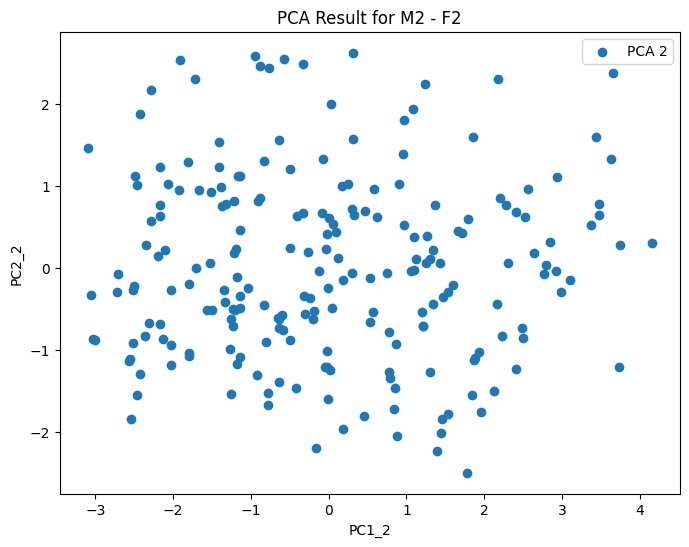

PCA for dataframe 3:
Explained variance ratio for the first 6 components: [0.23452473 0.21777908 0.16711617 0.14319049 0.12988781 0.05541546]
------


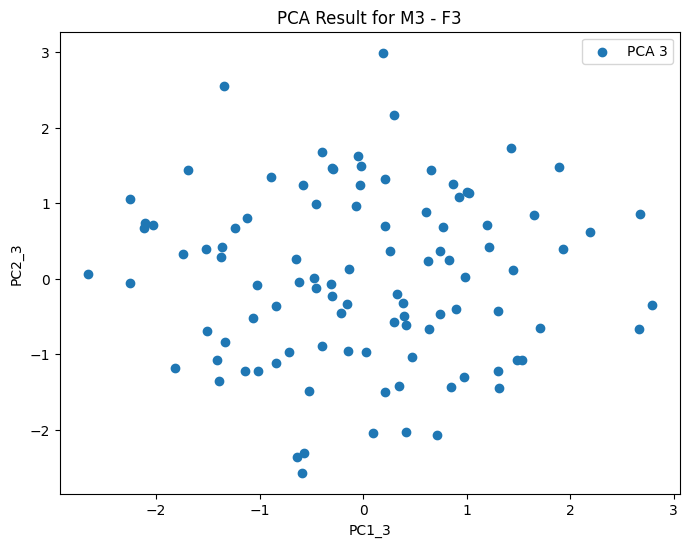

PCA for dataframe 4:
Explained variance ratio for the first 6 components: [0.19878328 0.15645    0.1416058  0.13325389 0.10468816 0.10160537]
------


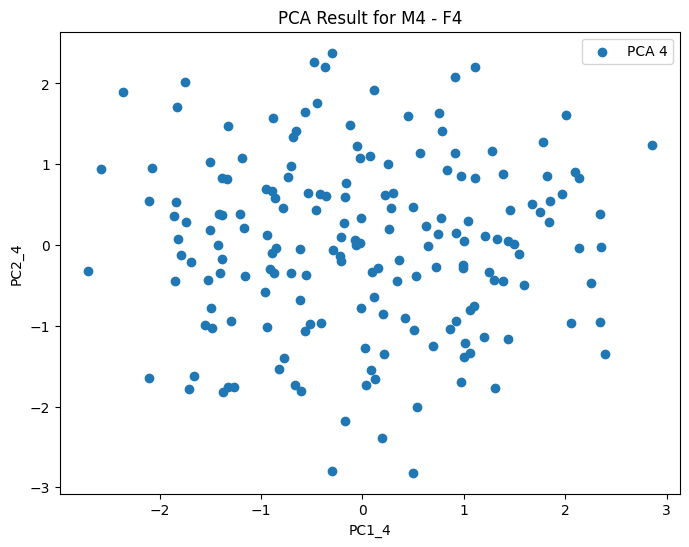

PCA for dataframe 5:
Explained variance ratio for the first 6 components: [0.18666049 0.18051564 0.15200427 0.13805698 0.11218794 0.06339171]
------


PCA for dataframe 6:
Explained variance ratio for the first 6 components: [0.27942368 0.20230749 0.18286662 0.13153989 0.0944347  0.04703872]
------


In [ ]:
dfs = [M1, M2, M3, F1, F2, F3]

# Loop over each dataframe to apply PCA
for i, df in enumerate(dfs):
    numerical_features = df.drop(columns=['Cluster'])

    # Perform PCA with 6 components
    pca = PCA(n_components=6)
    pca_components = pca.fit_transform(numerical_features)

    # Add PCA components back to the dataframe
    for j in range(6):
        df[f'PC{j+1}_{i+1}'] = pca_components[:, j]

    # Print the explained variance ratio
    print(f"PCA for dataframe {i+1}:")
    print(f"Explained variance ratio for the first 6 components: {pca.explained_variance_ratio_}")
    print("------")

    # Visualize the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(df[f'PC1_{i+1}'], df[f'PC2_{i+1}'], label=f'PCA {i+1}')
    plt.xlabel(f'PC1_{i+1}')
    plt.ylabel(f'PC2_{i+1}')
    plt.title(f'PCA Result for M{i+1} - F{i+1}')
    plt.legend()
    plt.show()

In [ ]:
#When we look at the first 6 principal components for each dataset, adding them up, we get roughly 60-70%. This is sufficient for dimensionality reduction for better visualization.

In [ ]:
# Empty list to store the new dataframes with only PCA components
pca_dfs = []

# Loop over each dataframe to apply PCA and create a new dataframe with PC1...PC6
for i, df in enumerate(dfs):
    # Assuming PCA was applied earlier and PC1...PC6 columns are already added to the dataframe
    pca_columns = [f'PC{j+1}_{i+1}' for j in range(6)]  # Get the names of the first 6 PCs for this dataframe

    # Create a new dataframe with only the PCA columns
    pca_df = df[pca_columns].copy()

    # Store this new dataframe in the pca_dfs list
    pca_dfs.append(pca_df)

    # Print the first few rows of the new dataframe
    print(f"New dataframe for PCA components (PC1 to PC6) - M{i+1} :")
    print(pca_df.head())
    print("------")

New dataframe for PCA components (PC1 to PC6) - M1 :
       PC1_1     PC2_1     PC3_1     PC4_1     PC5_1     PC6_1
3  -1.892042 -0.398315  1.415110 -0.209556  0.893097 -2.474346
4  -2.590356 -0.730318  1.282210  0.221278 -0.031028 -0.742336
9   0.717038 -0.031719 -1.539813  0.412473 -0.381881 -0.407022
10  3.123727 -0.409765  0.917217 -0.666549  0.334103 -0.586727
13 -0.130055 -0.034463 -1.276411  0.272426  0.033824  1.416578
------
New dataframe for PCA components (PC1 to PC6) - M2 :
       PC1_2     PC2_2     PC3_2     PC4_2     PC5_2     PC6_2
6  -0.580754  2.554455  1.281143  1.110804  0.208218 -0.285143
8   1.447879 -2.010717  0.201045 -1.618256 -0.681004  0.781105
11 -2.068850  1.022159 -0.267493  1.399273  0.983905 -0.379936
12  2.851393  0.319912 -0.739441  2.516457 -0.871825 -0.367150
14  2.310563  0.056137  1.431135 -0.404363 -2.087511 -0.898060
------
New dataframe for PCA components (PC1 to PC6) - M3 :
       PC1_3     PC2_3     PC3_3     PC4_3     PC5_3     PC6_3
0  -0.71

DBSCAN results for dataframe M1:
Number of clusters: 1
Number of noise points (cluster -1): 14
------


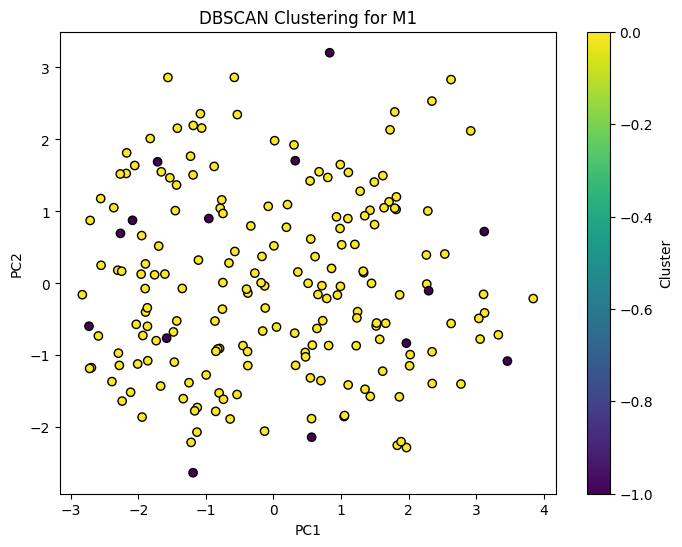

DBSCAN results for dataframe M2:
Number of clusters: 1
Number of noise points (cluster -1): 0
------


DBSCAN results for dataframe M3:
Number of clusters: 1
Number of noise points (cluster -1): 3
------


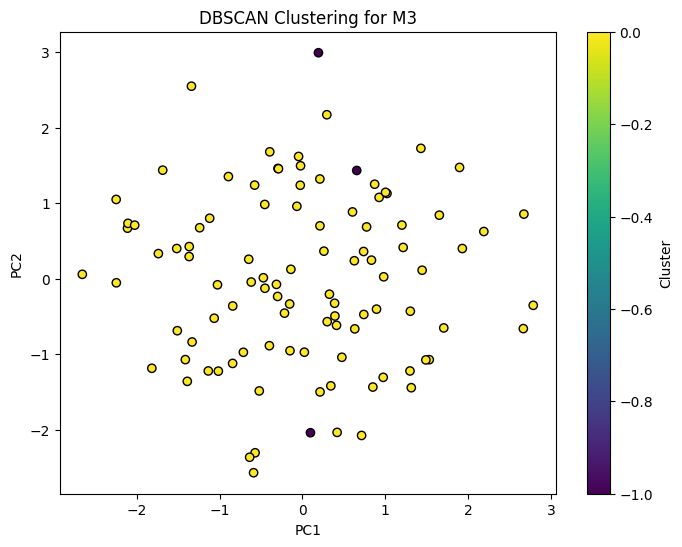

DBSCAN results for dataframe M4:
Number of clusters: 1
Number of noise points (cluster -1): 3
------


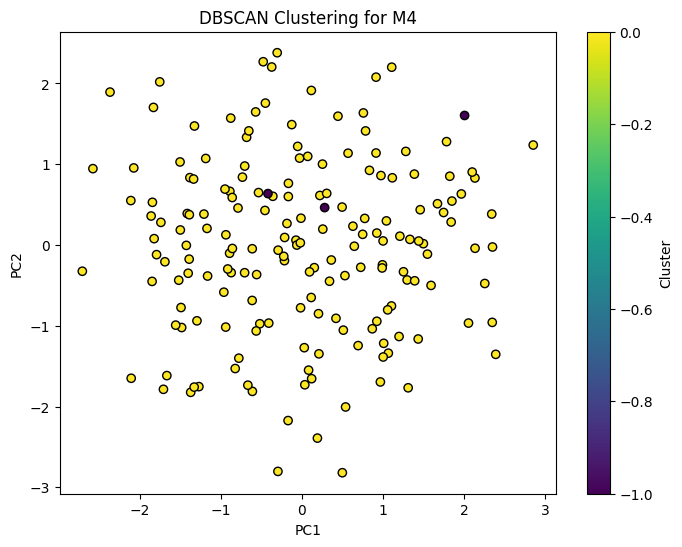

DBSCAN results for dataframe M5:
Number of clusters: 1
Number of noise points (cluster -1): 0
------


DBSCAN results for dataframe M6:
Number of clusters: 1
Number of noise points (cluster -1): 0
------


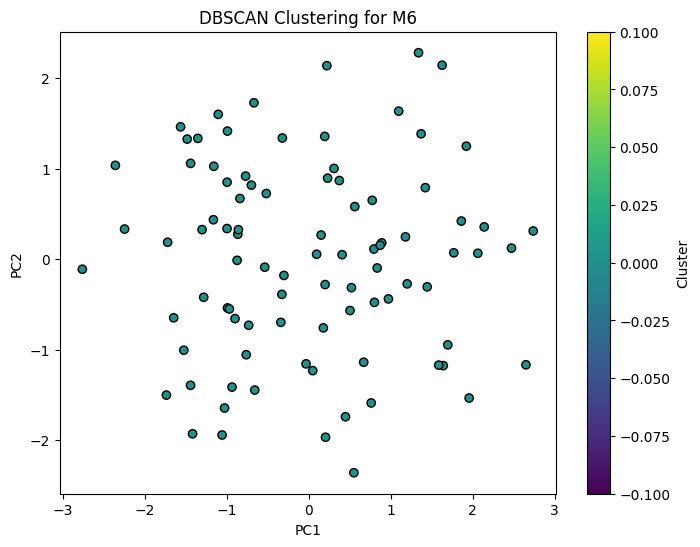

In [ ]:
# Define the DBSCAN parameters
dbscan = DBSCAN(eps=2, min_samples=3)

for i, pca_df in enumerate(pca_dfs):
    # Apply DBSCAN clustering
    pca_df['Cluster'] = dbscan.fit_predict(pca_df)  # Adding the cluster labels

    # Print cluster results
    print(f"DBSCAN results for dataframe M{i+1}:")
    print(f"Number of clusters: {len(set(pca_df['Cluster'])) - (1 if -1 in pca_df['Cluster'].values else 0)}")
    print(f"Number of noise points (cluster -1): {list(pca_df['Cluster']).count(-1)}")
    print("------")

    # Visualizing the clusters (PC1 vs PC2)
    if pca_df.shape[1] >= 2:  # Plot only if there are at least 2 components
        plt.figure(figsize=(8, 6))
        pc1_column = f'PC1_{i+1}'  # Dynamically refer to the PC1 column for the ith dataframe
        pc2_column = f'PC2_{i+1}'  # Dynamically refer to the PC2 column for the ith dataframe

        plt.scatter(pca_df[pc1_column], pca_df[pc2_column], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
        plt.title(f"DBSCAN Clustering for M{i+1}")
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.colorbar(label='Cluster')
        plt.show()


K-means clustering results for dataframe M1 / F1:
Number of clusters: 3
Cluster distribution: Cluster
0    94
1    56
2    47
Name: count, dtype: int64
------


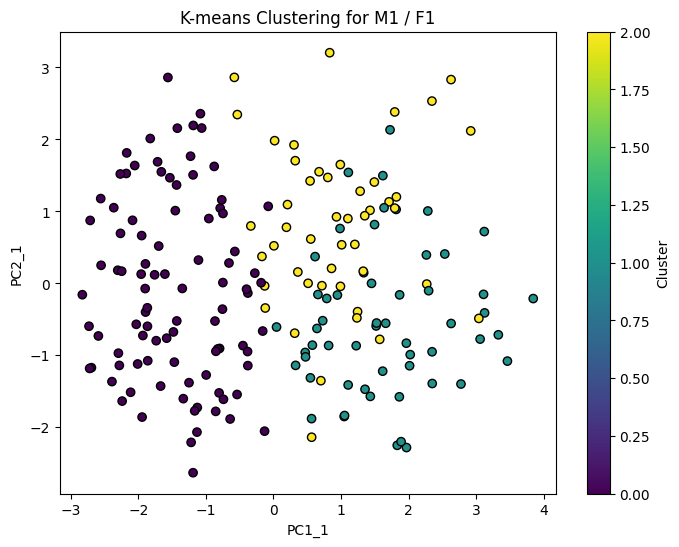

K-means clustering results for dataframe M2 / F2:
Number of clusters: 3
Cluster distribution: Cluster
1    80
2    78
0    55
Name: count, dtype: int64
------


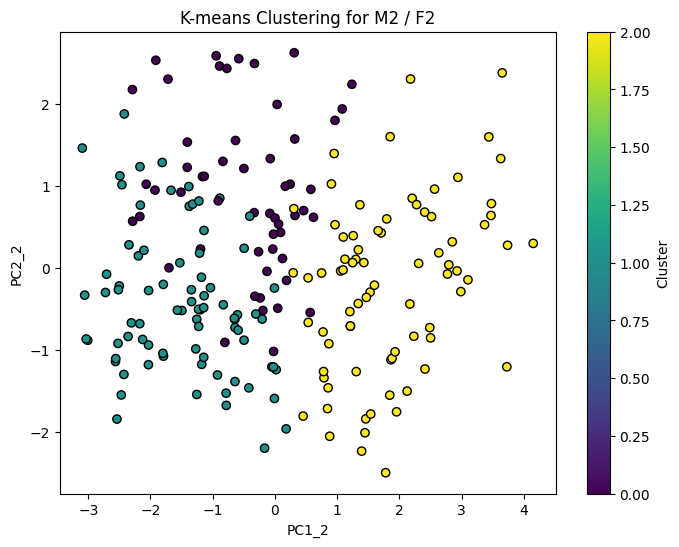

K-means clustering results for dataframe M3 / F3:
Number of clusters: 3
Cluster distribution: Cluster
0    39
1    34
2    28
Name: count, dtype: int64
------


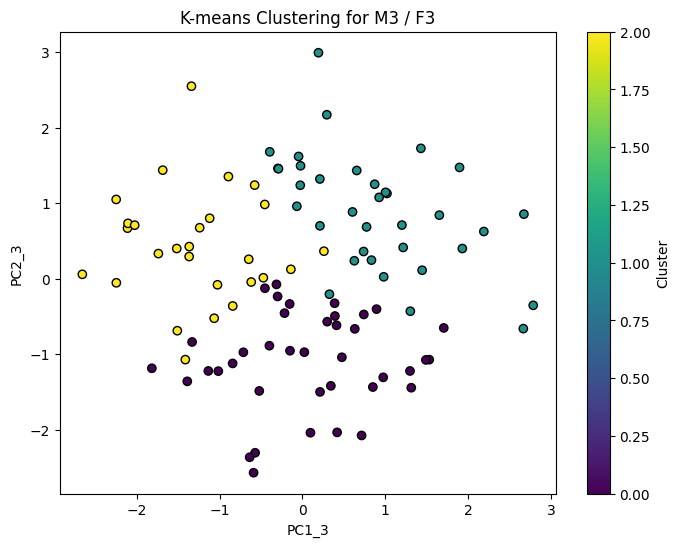

K-means clustering results for dataframe M4 / F4:
Number of clusters: 3
Cluster distribution: Cluster
2    66
0    66
1    47
Name: count, dtype: int64
------


K-means clustering results for dataframe M5 / F5:
Number of clusters: 3
Cluster distribution: Cluster
1    85
2    62
0    46
Name: count, dtype: int64
------


K-means clustering results for dataframe M6 / F6:
Number of clusters: 3
Cluster distribution: Cluster
1    32
2    30
0    28
Name: count, dtype: int64
------


In [ ]:
from sklearn.cluster import KMeans

# Loop over each dataframe to apply K-means clustering on the PCA components
for i, df in enumerate(dfs):
    # Use only the PCA columns for clustering (PC1 to PC6 for this dataframe)
    pca_columns = [f'PC{j+1}_{i+1}' for j in range(6)]

    # Apply K-means clustering (set k=3 as an example)
    kmeans = KMeans(n_clusters=3, random_state=42, max_iter=400, tol=1e-6)
    df['Cluster'] = kmeans.fit_predict(df[pca_columns])  # Add the cluster labels

    # Print cluster results
    print(f"K-means clustering results for dataframe M{i+1} / F{i+1}:")
    print(f"Number of clusters: {len(set(df['Cluster']))}")
    print(f"Cluster distribution: {df['Cluster'].value_counts()}")
    print("------")

    # Optional: Visualize the first two principal components with clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(df[f'PC1_{i+1}'], df[f'PC2_{i+1}'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
    plt.title(f'K-means Clustering for M{i+1} / F{i+1}')
    plt.xlabel(f'PC1_{i+1}')
    plt.ylabel(f'PC2_{i+1}')
    plt.colorbar(label='Cluster')
    plt.show()

In [ ]:
dfs

[          Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
 3   -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
 4   -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   
 9   -0.877515     1.318387    0.919831 -0.944799 -0.541697     0.242647   
 10   0.190276     2.214757   -0.411891  0.704540  0.155764    -1.122858   
 13   0.190276     0.973992    2.173217 -0.076726 -0.541697     0.925400   
 ..        ...          ...         ...       ...       ...          ...   
 937 -1.370342     1.582580    0.136465  1.312192 -0.402205     0.106097   
 940  0.354552    -1.304675   -0.725238 -0.337148 -0.332459     0.379198   
 951  0.847378    -0.785724    1.311514  1.051770 -0.611443    -0.030454   
 969 -1.123928    -0.342257   -0.881911  0.357311  1.550685    -0.849757   
 972  0.600965     0.700363   -0.725238 -1.205221  0.155764     0.515749   
 
      Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
 3                 

In [ ]:
concatenated_dfs = []
for i, df in enumerate(dfs):
    # Concatenate the respective 'type' column dataframe with the main dataframe
    if i < 3:  # M1, M2, M3
        df_type = globals()[f'M{i+1}_type']
    else:  # F1, F2, F3
        df_type = globals()[f'F{i-2}_type']

    # Concatenate the dataframes (axis=1 to join on columns)
    concatenated_df = pd.concat([df, df_type], axis=1)

    # Add the result to the list
    concatenated_dfs.append(concatenated_df)

In [ ]:
concatenated_dfs

[          Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
 3   -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
 4   -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   
 9   -0.877515     1.318387    0.919831 -0.944799 -0.541697     0.242647   
 10   0.190276     2.214757   -0.411891  0.704540  0.155764    -1.122858   
 13   0.190276     0.973992    2.173217 -0.076726 -0.541697     0.925400   
 ..        ...          ...         ...       ...       ...          ...   
 937 -1.370342     1.582580    0.136465  1.312192 -0.402205     0.106097   
 940  0.354552    -1.304675   -0.725238 -0.337148 -0.332459     0.379198   
 951  0.847378    -0.785724    1.311514  1.051770 -0.611443    -0.030454   
 969 -1.123928    -0.342257   -0.881911  0.357311  1.550685    -0.849757   
 972  0.600965     0.700363   -0.725238 -1.205221  0.155764     0.515749   
 
      Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
 3                 

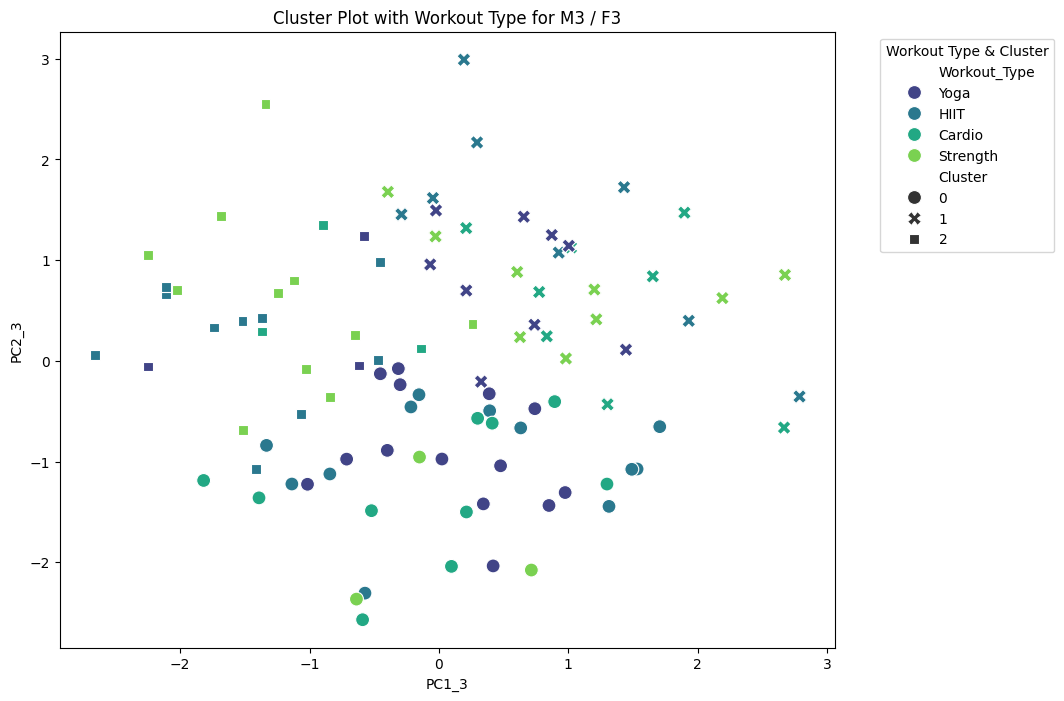

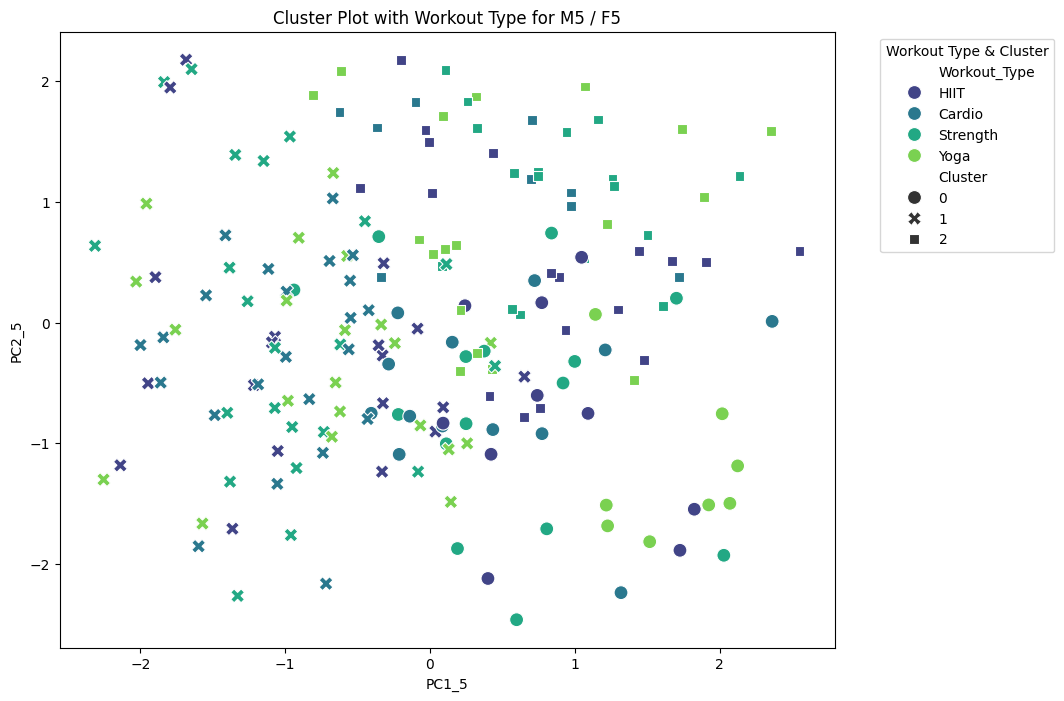

In [ ]:
for i, df in enumerate(concatenated_dfs):
    # Identify the PCA columns (assuming they are named 'PC1', 'PC2', etc.)
    pca_columns = [f'PC{j+1}_{i+1}' for j in range(6)]  # Adjust for the i-th dataframe

    # Create a scatter plot for each cluster label
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=pca_columns[0], y=pca_columns[1], hue='Workout_Type', style='Cluster', palette='viridis', s=100)

    # Set the title and labels
    plt.title(f'Cluster Plot with Workout Type for M{i+1} / F{i+1}')
    plt.xlabel(f'{pca_columns[0]}')
    plt.ylabel(f'{pca_columns[1]}')
    plt.legend(title='Workout Type & Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MLP Model definition with 4 hidden layers and Leaky ReLU
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLPClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, output_dim)

        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.batch_norm4 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = self.dropout(torch.nn.functional.leaky_relu(self.batch_norm1(self.layer1(x))))
        x = self.dropout(torch.nn.functional.leaky_relu(self.batch_norm2(self.layer2(x))))
        x = self.dropout(torch.nn.functional.leaky_relu(self.batch_norm3(self.layer3(x))))
        x = self.dropout(torch.nn.functional.leaky_relu(self.batch_norm4(self.layer4(x))))
        return self.output(x)  #CrossEntropyLoss handles it


In [ ]:
# Loop through each dataframe
for i, df in enumerate(concatenated_dfs):
    # Select the PCA columns as features
    pca_columns = [f'PC{j+1}_{i+1}' for j in range(6)]  # Adjust for i-th dataframe
    X = df[pca_columns].values
    y = df['Workout_Type'].values

    # Encode the `Workout_Type` column as labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Convert to torch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)  # For CrossEntropyLoss

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

    # Create DataLoader for training and testing data
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Initialize the model, loss function, and optimizer
    model = MLPClassifier(input_dim=X.shape[1], output_dim=len(label_encoder.classes_)).to(device)
    criterion = nn.CrossEntropyLoss()  # Multi-class classification
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)  # AdamW with weight decay
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

    # Training loop with 500 epochs
    num_epochs = 1000
    batch_size = 16
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Compute the loss
            loss = criterion(outputs, targets)

            # Backward pass and optimization
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
            optimizer.step()

            running_loss += loss.item()

        # Step the learning rate scheduler
        scheduler.step(running_loss)

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    # Evaluation loop
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * len(label_encoder.classes_)
    class_total = [0] * len(label_encoder.classes_)

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)

            # Convert predictions to labels
            _, predicted = torch.max(outputs, dim=1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

            # Per-class accuracy
            for label in range(len(label_encoder.classes_)):
                class_correct[label] += ((predicted == label) & (targets == label)).sum().item()
                class_total[label] += (targets == label).sum().item()

    # Calculate overall accuracy
    accuracy = correct / total
    print(f"Overall Accuracy for M{i+1}/F{i+1}: {accuracy*100:.2f}%")

    # Calculate per-class accuracy
    for label, class_name in enumerate(label_encoder.classes_):
        class_acc = (class_correct[label] / class_total[label]) * 100 if class_total[label] > 0 else 0
        print(f"Class {class_name} Accuracy: {class_acc:.2f}%")


Epoch [10/1000], Loss: 1.3311
Epoch [20/1000], Loss: 1.2473
Epoch [30/1000], Loss: 1.2351
Epoch [40/1000], Loss: 1.1972
Epoch [50/1000], Loss: 1.0784
Epoch [60/1000], Loss: 1.0711
Epoch [70/1000], Loss: 0.9942
Epoch [80/1000], Loss: 0.9940
Epoch [90/1000], Loss: 1.0543
Epoch [100/1000], Loss: 0.9211
Epoch [110/1000], Loss: 0.9103
Epoch [120/1000], Loss: 0.8386
Epoch [130/1000], Loss: 0.8140
Epoch [140/1000], Loss: 0.7520
Epoch [150/1000], Loss: 0.7073
Epoch [160/1000], Loss: 0.7445
Epoch [170/1000], Loss: 0.7726
Epoch [180/1000], Loss: 0.6879
Epoch [190/1000], Loss: 0.6186
Epoch [200/1000], Loss: 0.6651
Epoch [210/1000], Loss: 0.6517
Epoch [220/1000], Loss: 0.7542
Epoch [230/1000], Loss: 0.6146
Epoch [240/1000], Loss: 0.7693
Epoch [250/1000], Loss: 0.7385
Epoch [260/1000], Loss: 0.7676
Epoch [270/1000], Loss: 0.6371
Epoch [280/1000], Loss: 0.5964
Epoch [290/1000], Loss: 0.7479
Epoch [300/1000], Loss: 0.5533
Epoch [310/1000], Loss: 0.6941
Epoch [320/1000], Loss: 0.6207
Epoch [330/1000],

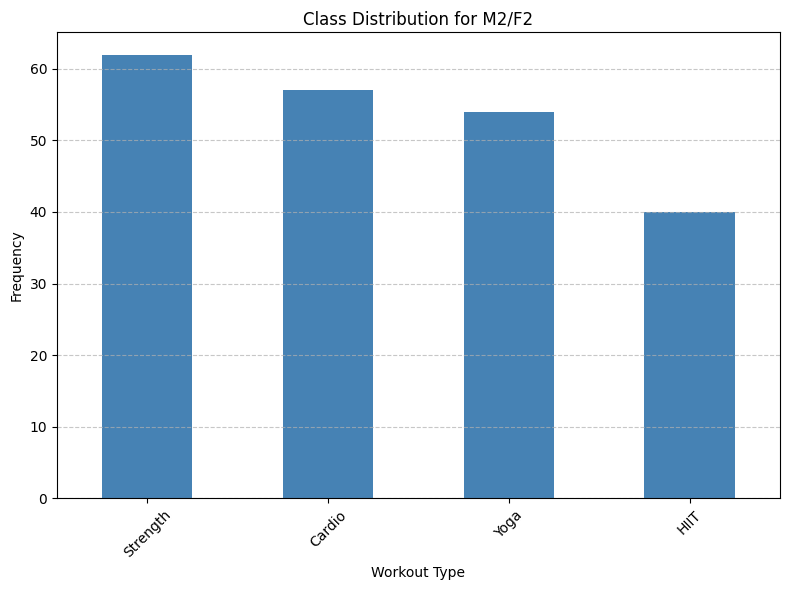

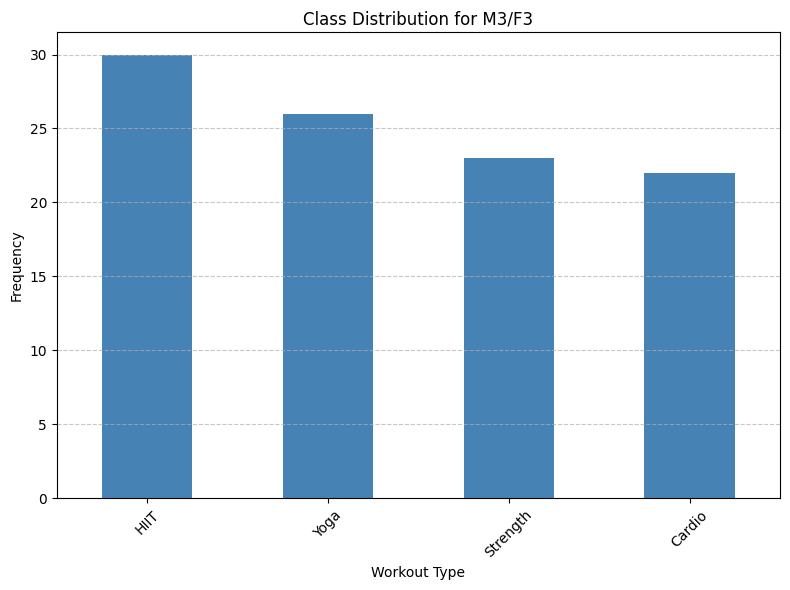

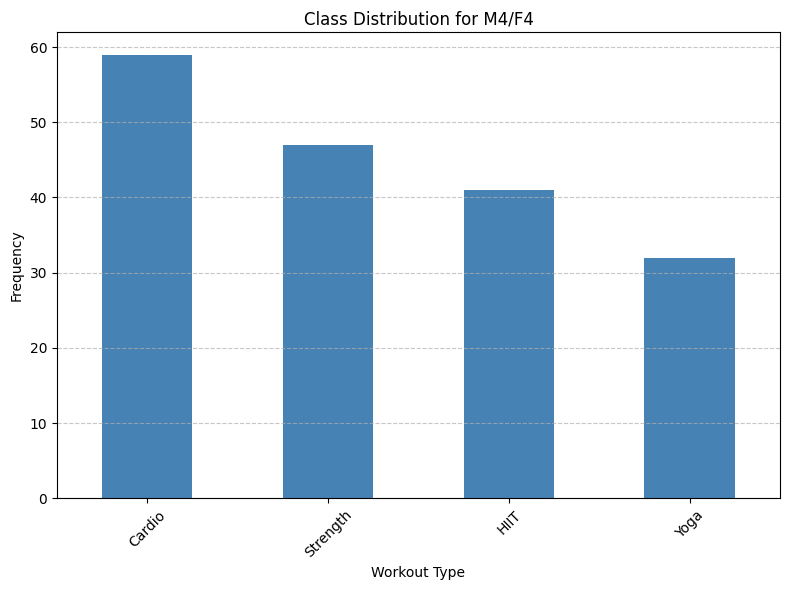

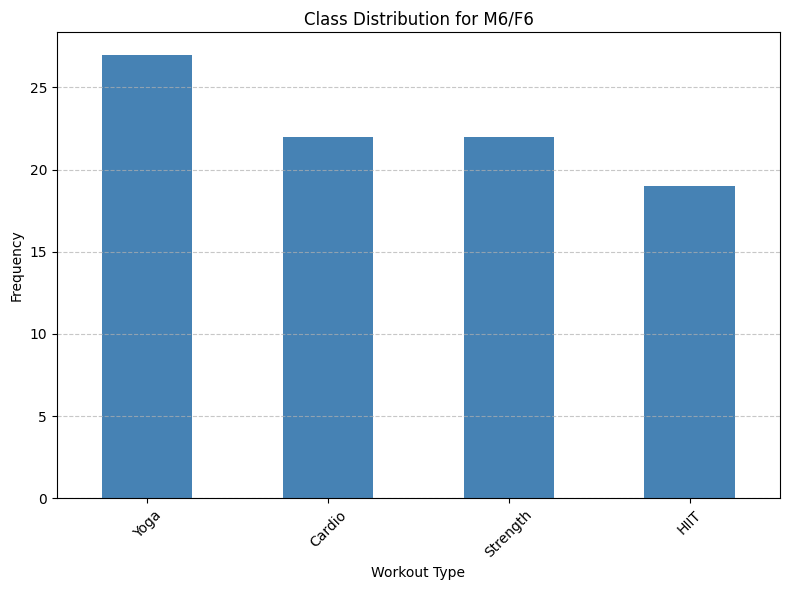

In [ ]:
#Let us check if there is class imbalance in each df
for i, df in enumerate(concatenated_dfs):
    # Count the occurrences of each class
    class_counts = df['Workout_Type'].value_counts()

    # Plot the class distribution with uniform color
    plt.figure(figsize=(8, 6))
    class_counts.plot(kind='bar', color='steelblue')  # Single color for all bars
    plt.title(f'Class Distribution for M{i+1}/F{i+1}')
    plt.xlabel('Workout Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
#Since we are not able to solve a classification problem, let us study the user-item interactions better and use existing data to build a matrix

In [ ]:
#we use the PCA components of the user rows, and workout type as item.

In [ ]:
user_data = []
workout_labels = []

for i, df in enumerate(concatenated_dfs):
    pca_columns = [f'PC{j+1}_{i+1}' for j in range(6)]
    X = df[pca_columns].values
    y = df['Workout_Type'].values

    # Encode workout type as integer labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Store user features (PCA) and corresponding workout labels
    user_data.append(X)
    workout_labels.append(y)

# Flatten the data (this will be needed later for PyTorch training)
user_data = np.vstack(user_data)
workout_labels = np.hstack(workout_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(user_data, workout_labels, test_size=0.2, random_state=42)


In [ ]:
#We need user embedding and item embedding for NCF. And let us build the Neural network to learn the interactions between them.

In [ ]:
# Model definition
class NeuralCollaborativeFiltering(nn.Module):
    def __init__(self, num_user_features, num_workout_types):
        super(NeuralCollaborativeFiltering, self).__init__()
        self.fc1 = nn.Linear(num_user_features, 128)  # First layer for user features
        self.fc2 = nn.Linear(128, 64)  # Hidden layer
        self.fc3 = nn.Linear(64, 32)  # Hidden layer
        self.fc4 = nn.Linear(32, num_workout_types)  # Output layer

    def forward(self, user_features):
        x = torch.relu(self.fc1(user_features))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No activation here, softmax will be handled in loss function
        return x

In [ ]:
# Convert the data into PyTorch tensors
train_user_features = torch.tensor(X_train, dtype=torch.float32)
train_workout_labels = torch.tensor(y_train, dtype=torch.long)
test_user_features = torch.tensor(X_test, dtype=torch.float32)
test_workout_labels = torch.tensor(y_test, dtype=torch.long)

# Initialize the model
num_user_features = X_train.shape[1]  # Number of PCA components (features)
num_workout_types = len(np.unique(y_train))  # Number of workout types (classes)
model = NeuralCollaborativeFiltering(num_user_features, num_workout_types)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 350
batch_size = 64
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Mini-batch training
    for i in range(0, len(train_user_features), batch_size):
        user_batch = train_user_features[i:i+batch_size]
        workout_batch = train_workout_labels[i:i+batch_size]

        optimizer.zero_grad()

        # Forward pass
        outputs = model(user_batch)

        # Compute loss
        loss = criterion(outputs, workout_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_user_features):.4f}")


Epoch [10/350], Loss: 0.0219
Epoch [20/350], Loss: 0.0200
Epoch [30/350], Loss: 0.0182
Epoch [40/350], Loss: 0.0163
Epoch [50/350], Loss: 0.0144
Epoch [60/350], Loss: 0.0125
Epoch [70/350], Loss: 0.0107
Epoch [80/350], Loss: 0.0089
Epoch [90/350], Loss: 0.0074
Epoch [100/350], Loss: 0.0061
Epoch [110/350], Loss: 0.0055
Epoch [120/350], Loss: 0.0094
Epoch [130/350], Loss: 0.0038
Epoch [140/350], Loss: 0.0029
Epoch [150/350], Loss: 0.0024
Epoch [160/350], Loss: 0.0021
Epoch [170/350], Loss: 0.0017
Epoch [180/350], Loss: 0.0015
Epoch [190/350], Loss: 0.0016
Epoch [200/350], Loss: 0.0020
Epoch [210/350], Loss: 0.0059
Epoch [220/350], Loss: 0.0009
Epoch [230/350], Loss: 0.0006
Epoch [240/350], Loss: 0.0006
Epoch [250/350], Loss: 0.0005
Epoch [260/350], Loss: 0.0004
Epoch [270/350], Loss: 0.0004
Epoch [280/350], Loss: 0.0004
Epoch [290/350], Loss: 0.0003
Epoch [300/350], Loss: 0.0003
Epoch [310/350], Loss: 0.0003
Epoch [320/350], Loss: 0.0002
Epoch [330/350], Loss: 0.0002
Epoch [340/350], Lo

In [ ]:
#Let us evaluate the MAP@K for top 2 predictions

In [ ]:
# Define average precision at k calculation
def average_precision_at_k(y_true, y_pred, k=2):
    k = min(k, y_pred.size(1))  # Ensure k does not exceed number of classes

    # Get top K predictions
    _, top_k_preds = torch.topk(y_pred, k, dim=1, largest=True, sorted=True)

    # Check if the true label is within the top K predictions
    relevant = torch.any(top_k_preds == y_true.unsqueeze(1), dim=1).float()  # [batch_size]

    # Precision at each rank
    precision_at_k = relevant.cumsum(dim=0) / (torch.arange(1, len(relevant) + 1).float().to(y_true.device))

    # Average precision for the current sample (user)
    avg_precision = precision_at_k[-1]  # Last value in precision_at_k gives average precision

    return avg_precision.mean().item()  # Return mean of average precision across all users

# Evaluate MAP@K
def evaluate_map_at_k(model, test_user_features, test_workout_labels, k=2):
    model.eval()  # Switch to evaluation mode
    total_avg_precision = 0.0
    num_samples = 0

    with torch.no_grad():  # No gradient computation during evaluation
        # Forward pass: Get the model's predictions
        outputs = model(test_user_features)  # [batch_size, num_classes]

        # Ensure that outputs are probabilities (softmax)
        outputs = torch.nn.functional.softmax(outputs, dim=1)

        # Calculate average precision at K for this batch
        avg_precision = average_precision_at_k(test_workout_labels, outputs, k)

        total_avg_precision += avg_precision
        num_samples += 1

    # Calculate mean average precision across all samples
    map_at_k = total_avg_precision / num_samples
    return map_at_k

# Evaluate MAP@K on test data
map_at_k = evaluate_map_at_k(model, test_user_features, test_workout_labels, k=2)
print(f'MAP@2: {map_at_k:.4f}')

MAP@2: 0.5385
